In [1]:
import pandas as pd
import numpy as np
import math
import time

# Table of contents
1. [Loading data from the website](#websiteData)
2. [Loading data locally](#localData)
3. [Dataset creation initial functions](#datasetCreate)  
    a. [Victory Point (target) dataset](#VPData)  
    b. [Features dataset](#featuresData)
4. [Speeding check & speed up dataset creation & sense-checking on small batch](#speedUp)
5. [Cleaning & filtering the data](#cleanUp)
6. [Creating the full dataset](#fullDataset)

## Loading data from the website (not using this right now - for now we'll just load locally) <a name="websiteData"></a>
But we'll keep this section here for now, commented out. The reason we're not using this is because the jsons are nested, which would require a bit of time to unpack. I'd like to focus on the cleaning / making some form of useful data and modelling, for now. Later we can go back and get more data.

In [2]:
# bigoldlist = ['2013-02.json',
# '2013-03.json',
# '2013-04.json',
# '2013-05.json',
# '2013-06.json',
# '2013-07.json',
# '2013-08.json',
# '2013-09.json',
# '2013-10.json',
# '2013-11.json',
# '2013-12.json',
# '2014-01.json',
# '2014-02.json',
# '2014-03.json',
# '2014-04.json',
# '2014-05.json',
# '2014-06.json',
# '2014-07.json',
# '2014-08.json',
# '2014-09.json',
# '2014-10.json',
# '2014-11.json',
# '2014-12.json',
# '2015-01.json',
# '2015-02.json',
# '2015-03.json',
# '2015-04.json',
# '2015-05.json',
# '2015-06.json',
# '2015-07.json',
# '2015-08.json',
# '2015-09.json',
# '2015-10.json',
# '2015-11.json',
# '2015-12.json',
# '2016-01.json',
# '2016-02.json',
# '2016-03.json',
# '2016-04.json',
# '2016-05.json',
# '2016-06.json',
# '2016-07.json',
# '2016-08.json',
# '2016-09.json',
# '2016-10.json',
# '2016-11.json',
# '2016-12.json',
# '2017-01.json',
# '2017-02.json',
# '2017-03.json',
# '2017-04.json',
# '2017-05.json',
# '2017-06.json',
# '2017-07.json',
# '2017-08.json',
# '2017-09.json',
# '2017-10.json',
# '2017-11.json',
# '2017-12.json',
# '2018-01.json',
# '2018-02.json',
# '2018-03.json',
# '2018-04.json',
# '2018-05.json',
# '2018-06.json',
# '2018-07.json',
# '2018-08.json',
# '2018-09.json',
# '2018-10.json',
# '2018-11.json',
# '2018-12.json',
# '2019-01.json',
# '2019-02.json',
# '2019-03.json',
# '2019-04.json',
# '2019-05.json',
# '2019-06.json',
# '2019-07.json',
# '2019-08.json',
# '2019-09.json',
# '2019-10.json',
# '2019-11.json',
# '2019-12.json',
# '2020-01.json',
# '2020-02.json',
# '2020-03.json',
# '2020-04.json',
# '2020-05.json',
# '2020-06.json',
# '2020-07.json',
# '2020-08.json',
# '2020-09.json',
# '2020-10.json',
# '2020-11.json',
# '2020-12.json',
# '2021-01.json',
# '2021-02.json',
# '2021-03.json',
# '2021-04.json']

In [3]:
# # Test start of web pipeline (not used)
# url = 'https://terra.snellman.net/data/events/' + bigoldlist[0]
# eventsdata1 = pd.read_json(url)
# print(len(eventsdata1))
# eventsdata1.head()

In [4]:
# # Load in the data remotely
# for gameset in bigoldlist:
#     url = 'https://terra.snellman.net/data/events/' + gameset
#     eventsdata = pd.read_json(url)
    
#     for eachgame in range(len(gameset)):
#         singlerow = eventsdata.iloc[[eachgame]]
#         newcol = get_vp_from_game(gameEventRow)
#         vpdf = vpdf.append(newdf, ignore_index=True)      

## Loading in the data Locally <a name="localData"></a>

In [5]:
folderlocation = "D:/PycharmProjects/TerraBot/terra-mystica"
gameevents = pd.read_csv(f'{folderlocation}/game_events.csv')
games = pd.read_csv(f'{folderlocation}/games.csv')


## EDA

In [6]:
# get some more stats
gameslist = list(pd.unique(gameevents['game']))
print(f'Number of game events: {len(gameevents)}')
print(f"Number of games in gameevents: {len(gameslist)}")
print(f'len of games: {len(games)}')

Number of game events: 73419074
Number of games in gameevents: 115612
len of games: 115612


In [7]:
games

,base_map,game,last_update,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,0000000001,2015-07-22 05:15:51,2
1,be8f6ebf549404d015547152d5f2a1906ae8dd90,050615,2015-07-13 09:45:00,4
2,126fe960806d587c78546b30f1a90853b1ada468,0512,2015-07-03 04:17:31,4
3,126fe960806d587c78546b30f1a90853b1ada468,051501,2015-07-16 21:00:54,5
4,95a66999127893f5925a5f591d54f8bcb9a670e6,060303,2015-07-02 05:20:19,4
...,...,...,...,...
115607,126fe960806d587c78546b30f1a90853b1ada468,Youreacrookcaptianhook,2014-09-04 05:04:45,3
115608,126fe960806d587c78546b30f1a90853b1ada468,YourMomIsAChaosMagician,2014-09-02 00:23:43,4
115609,126fe960806d587c78546b30f1a90853b1ada468,ytuwertqwtr,2014-09-28 18:12:35,2
115610,126fe960806d587c78546b30f1a90853b1ada468,yuertyqert,2014-09-27 19:01:17,2


In [8]:
gameevents

,event,faction,game,num,round,turn
0,upgrade:SH,halflings,0000000001,1,2,1
1,order:2,halflings,0000000001,1,6,1
2,order:2,halflings,0000000001,1,2,1
3,order:1,halflings,0000000001,1,1,1
4,order:1,halflings,0000000001,1,5,1
...,...,...,...,...,...,...
73419069,burn,darklings,ZeicheMasZeuchnis,4,1,1
73419070,burn,darklings,ZeicheMasZeuchnis,3,5,2
73419071,favor:FAV10,darklings,ZeicheMasZeuchnis,1,3,3
73419072,town:TW3,darklings,ZeicheMasZeuchnis,1,6,2


In [9]:
allfactions = pd.unique(gameevents['faction'])
allfactions

array(['halflings', 'all', 'mermaids', 'dragonlords', 'riverwalkers',
       'yetis', 'darklings', 'chaosmagicians', 'engineers', 'icemaidens',
       'nomads', 'auren', 'fakirs', 'witches', 'cultists', 'alchemists',
       'swarmlings', 'dwarves', 'shapeshifters', 'nofaction1',
       'nofaction4', 'acolytes', 'giants', 'nofaction3', 'nofaction2',
       'nofaction5', 'nofaction7'], dtype=object)

In [10]:
gamescoringtiles = pd.read_csv(f'{folderlocation}/game_scoring_tiles.csv')
gameoptions = pd.read_csv(f'{folderlocation}/game_options.csv')
stats = pd.read_csv(f'{folderlocation}/stats.csv')

In [11]:
gamescoringtiles

,game,round,tile
0,0000000001,3,SCORE1
1,0000000001,6,SCORE5
2,0000000001,5,SCORE4
3,0000000001,1,SCORE8
4,0000000001,2,SCORE3
...,...,...,...
693655,ZeicheMasZeuchnis,4,SCORE1
693656,ZeicheMasZeuchnis,6,SCORE5
693657,ZeicheMasZeuchnis,5,SCORE7
693658,ZeicheMasZeuchnis,1,SCORE3


In [12]:
gamescoringtiles['tile'].value_counts()

SCORE3    83727
SCORE7    83435
SCORE8    83322
SCORE4    83270
SCORE2    83226
SCORE5    83188
SCORE6    82770
SCORE1    71728
SCORE9    38994
Name: tile, dtype: int64

In [13]:
print(len(pd.unique(gameoptions['option'])))
print(gameoptions['option'].value_counts() / len(gameoptions))
gameoptions

19
option-errata-cultist-power                 0.106882
option-strict-leech                         0.106427
option-strict-darkling-sh                   0.103665
option-strict-chaosmagician-sh              0.103642
option-email-notify                         0.100557
option-mini-expansion-1                     0.089982
option-shipping-bonus                       0.083785
option-variable-turn-order                  0.075660
option-temple-scoring-tile                  0.053650
option-fire-and-ice-factions/ice            0.039872
option-fire-and-ice-final-scoring           0.039481
option-fire-and-ice-factions/volcano        0.039336
option-fire-and-ice-factions/variable_v5    0.024844
option-maintain-player-order                0.021085
option-fire-and-ice-factions/variable_v3    0.004580
option-fire-and-ice-factions/variable       0.003220
option-fire-and-ice-factions/variable_v4    0.002017
option-fire-and-ice-factions/variable_v2    0.001303
option-loose-adjust-resource               

,game,option
0,0000000001,option-strict-darkling-sh
1,0000000001,option-email-notify
2,0000000001,option-shipping-bonus
3,0000000001,option-strict-chaosmagician-sh
4,0000000001,option-errata-cultist-power
...,...,...
1075569,ZeicheMasZeuchnis,option-email-notify
1075570,ZeicheMasZeuchnis,option-strict-chaosmagician-sh
1075571,ZeicheMasZeuchnis,option-errata-cultist-power
1075572,ZeicheMasZeuchnis,option-mini-expansion-1


In [14]:
gameevents['event'].value_counts()

vp              12839907
build:D          6570095
leech:count      5716489
leech:pw         5716489
upgrade:TP       3543848
                  ...   
action:ACTH5        1852
order:6              912
order:7              636
action:ACTH4         592
action:ACTH3         314
Name: event, Length: 91, dtype: int64

In [15]:
games['base_map'].value_counts()

126fe960806d587c78546b30f1a90853b1ada468    77158
95a66999127893f5925a5f591d54f8bcb9a670e6    21052
be8f6ebf549404d015547152d5f2a1906ae8dd90    16184
fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1     1210
224736500d20520f195970eb0fd4c41df040c08c        3
735b073fd7161268bb2796c1275abda92acd8b1a        2
30b6ded823e53670624981abdb2c5b8568a44091        1
c07f36f9e050992d2daf6d44af2bc51dca719c46        1
b109f78907d2cbd5699ced16572be46043558e41        1
Name: base_map, dtype: int64

[126fe960806d587c78546b30f1a90853b1ada468](https://terra.snellman.net/map/126fe960806d587c78546b30f1a90853b1ada468)
is the same as [91645cdb135773c2a7a50e5ca9cb18af54c664c4](https://terra.snellman.net/mapedit/91645cdb135773c2a7a50e5ca9cb18af54c664c4)  
[95a66999127893f5925a5f591d54f8bcb9a670e6](https://terra.snellman.net/map/95a66999127893f5925a5f591d54f8bcb9a670e6) is different  
[be8f6ebf549404d015547152d5f2a1906ae8dd90](https://terra.snellman.net/map/be8f6ebf549404d015547152d5f2a1906ae8dd90) is re-balanced.  

All other maps aren't present here so we'll use those

## Creating the new datasets - some functions to help us make these later <a name="datasetCreate"></a>

### Victory Points (target) dataset <a name="VPData"></a>
Let's make some functions to help make the dataset.

In [16]:
def makenewdf():
    """make an empty dataframe, organised in the way we want the target data, ready to be populated"""
    validfactions = ['witches', 'auren', 'swarmlings', 'mermaids', 'cultists', 'halflings', 'dwarves', 'engineers', 'chaosmagicians', 'giants', 'fakirs', 'nomads', 'darklings', 'alchemists']
    dfcols = ['game'] + validfactions
    vpdf = pd.DataFrame(columns=dfcols)
    
    return vpdf, dfcols, validfactions

vpdf, dfcols, validfactions = makenewdf()

sensecheck = False
if sensecheck:
    newdf = pd.DataFrame([[np.nan] * 15], columns=dfcols)
    newdf['auren'].replace({np.nan: 'test'}, inplace=True)
    vpdf = vpdf.append(newdf, ignore_index=True)
    print(len(vpdf))
    vpdf.head()

In [17]:
def get_vp_from_game(singleGameEvents):
    """Input game events for a single game. This is a pd.DataFrame. 
    Output a row where each faction in the game has its vp populated (the rest are nans)
    """
    newdf = pd.DataFrame([[np.nan] * 15], columns=dfcols)
    
    # assign the game number
    gameno = list(pd.unique(singleGameEvents['game']))
    
    # assert len(gameno) == 1, 'More than 1 unique game was found'    
    try:
        newdf['game'].replace({np.nan: gameno[0]}, inplace=True)
    except:
        print(f'DEBUGGING: len of table is {len(singleGameEvents)}')
        print(f'DEBUGGING: gamnos list: {gameno}')
        print(singleGameEvents)
        raise
        
    # find factions - there are some artifacts in the data. E.g. the "faction", "all". We need to filter them out.
    rawfactions = list(pd.unique(singleGameEvents['faction']))
    verifiedfactions = [rawfaction for rawfaction in rawfactions if rawfaction in validfactions]
    
    for faction in verifiedfactions:
        vpfaction = sum(singleGameEvents[(singleGameEvents['event'] == 'vp') & (singleGameEvents['faction'] == faction)]['num'])
        newdf[faction].replace({np.nan: vpfaction}, inplace=True)
        
    return newdf

In [18]:
# sense check
start = time.time()
singlegame = gameevents[gameevents['game'] == '0000000001']
singlegamefactions = (list(pd.unique(singlegame['faction'])))
vpforgame = get_vp_from_game(singlegame)
end = time.time()

print(f'Time elapsed: {end-start}s')
print(f'Time to do all games at current speed: {((end-start)*len(pd.unique(gameevents["game"]))/3600)}hrs')
vpforgame

Time elapsed: 3.7775845527648926s
Time to do all games at current speed: 121.31502925395965hrs


,game,witches,auren,swarmlings,mermaids,cultists,halflings,dwarves,engineers,chaosmagicians,giants,fakirs,nomads,darklings,alchemists
0,0000000001,NaN,NaN,NaN,118.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Features dataset <a name="featuresData"></a>
We'll want:
1. Boolean of bonus tiles (in game or not)  <span style="color:green">- DONE</span>
2. One-hot of round tiles, for each round  <span style="color:green">- DONE</span>
3. Boolean of factions already picked (more info if any have been picked yet) <span style="color:orange">- removed as would require 1 row for each faction. We want 1 line per game for now</span>
4. One-hot for different map variants we'd like to use  <span style="color:green">- DONE</span>
5. One-hot player count (from 2, 3, 4 or 5 players)  <span style="color:green">- DONE</span>

These are the bonus tiles available:  
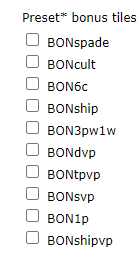

In [19]:
pd.unique(gameevents[(gameevents['round'] == 0) & (gameevents['game'] == 'ytuwertqwtr')]['event'])

array(['pass:BON10', 'build:D', 'pass:BON3'], dtype=object)

But it looks like we only have details on the bonus tiles selected in the middle of the game. Where can we get information about all bonus tiles in game!? I'm not sure, so I'll use the only info that's available - which is the bonus tiles that players select. However, if there's a bonus tile that was never selected during a game, it won't be shown. If we go onto the Snellman website and re-watch an old game, we can see what bonus tiles are available in the GUI, so this info must be stored somewhere (as game history GUI must be using the same data we're looking at...?)

In [20]:
# working out the code to get the bonus tiles & timing this
start = time.time()
allevents = list(pd.unique(gameevents[gameevents['game'] == 'ytuwertqwtr']['event']))
bonustiles = [event[5:] for event in allevents if event.startswith('pass:BON')]
end = time.time()
print(f'Time elapsed: {end-start}s')
print(bonustiles)

Time elapsed: 3.7590675354003906s
['BON8', 'BON6', 'BON3', 'BON10', 'BON9']


In [21]:
def emptyfeaturesdf():
    """make an empty dataframe, organised in the way we want the feature data, ready to be populated"""
    colnames = ['game']
    uniqueScoreTiles = np.sort(pd.unique(gamescoringtiles['tile']))
    
    # One-hot of round tiles, for each round
    for gameround in range(1, 7):
        roundstr = f'r{gameround}'
        for tile in uniqueScoreTiles:
            colnames.append(roundstr + '_' + tile)
    
    # Boolean of bonus tiles
    for bon in range(1, 11):
        colnames.append(f'BON{bon}')
        
    # One-hot player count (from 2, 3, 4 or 5 players)
    for player in range(2, 6):
        colnames.append(f'{player}players')
    
    # one hot of the map used
    """126fe960806d587c78546b30f1a90853b1ada468 - map1
       95a66999127893f5925a5f591d54f8bcb9a670e6 - map2
       be8f6ebf549404d015547152d5f2a1906ae8dd90 - map3
    """
    colnames = colnames + ['map1', 'map2', 'map3']
    
    featuresdf = pd.DataFrame(columns=colnames)
    
    return featuresdf, colnames

featuresdf, featcolnames = emptyfeaturesdf()
print(featcolnames)
print(len(featcolnames))


['game', 'r1_SCORE1', 'r1_SCORE2', 'r1_SCORE3', 'r1_SCORE4', 'r1_SCORE5', 'r1_SCORE6', 'r1_SCORE7', 'r1_SCORE8', 'r1_SCORE9', 'r2_SCORE1', 'r2_SCORE2', 'r2_SCORE3', 'r2_SCORE4', 'r2_SCORE5', 'r2_SCORE6', 'r2_SCORE7', 'r2_SCORE8', 'r2_SCORE9', 'r3_SCORE1', 'r3_SCORE2', 'r3_SCORE3', 'r3_SCORE4', 'r3_SCORE5', 'r3_SCORE6', 'r3_SCORE7', 'r3_SCORE8', 'r3_SCORE9', 'r4_SCORE1', 'r4_SCORE2', 'r4_SCORE3', 'r4_SCORE4', 'r4_SCORE5', 'r4_SCORE6', 'r4_SCORE7', 'r4_SCORE8', 'r4_SCORE9', 'r5_SCORE1', 'r5_SCORE2', 'r5_SCORE3', 'r5_SCORE4', 'r5_SCORE5', 'r5_SCORE6', 'r5_SCORE7', 'r5_SCORE8', 'r5_SCORE9', 'r6_SCORE1', 'r6_SCORE2', 'r6_SCORE3', 'r6_SCORE4', 'r6_SCORE5', 'r6_SCORE6', 'r6_SCORE7', 'r6_SCORE8', 'r6_SCORE9', 'BON1', 'BON2', 'BON3', 'BON4', 'BON5', 'BON6', 'BON7', 'BON8', 'BON9', 'BON10', '2players', '3players', '4players', '5players', 'map1', 'map2', 'map3']
72


In [22]:
def get_features_from_game(singlegameevents, singlegamemeta, singlegameST, singleendplayers=None):
    """
    Inputs:
        singlegameevents <pd.DataFrame>   - is game events for a single game 
        singlegamemeta   <pd.DataFrame>   - is a single row from `games` that gives map & player count
        singlegameST     <pd.DataFrame>   - is a single row from `gamescoringtiles` that gives... score tile (suprisingly)
        singleendplayers <pd.DataFrame>   - is a single row from `end players` that gives the amount of players at end of game, after dropouts
    Return:          <pd.DataFrame>   - a row where features have been found (will be sparse)
    """
    newdf = pd.DataFrame([[0] * len(featcolnames)], columns=featcolnames)
    
    # assign game string
    singlegamemeta.iloc[0]['game']
    newdf['game'].replace({0: singlegamemeta.iloc[0]['game']}, inplace=True)
    
    # find the round tiles for each round
    for gameround in range(1, 7):
        roundstr = f'r{gameround}'
        scoretile = roundstr + '_' + singlegameST[singlegameST['round'] == gameround]['tile'].values[0]
        newdf[scoretile].replace({0: 1}, inplace=True)
        
    # Boolean of bonus tiles
    uniqueevents = list(pd.unique(singlegameevents['event']))
    bonustiles = [event[5:] for event in uniqueevents if event.startswith('pass:BON')]
    for bontile in bonustiles:
        newdf[bontile].replace({0: 1}, inplace=True)
       
    # One-hot player count (from 2, 3, 4 or 5 players)
    if singleendplayers is None:
        noplayers = singlegamemeta.iloc[0]['player_count']
        print('gamemeta used for player count')
    else:
        noplayers = singleendplayers.iloc[0]['endplayers']
        
    players = f'{noplayers}players'
    newdf[players].replace({0: 1}, inplace=True)
          
    # one hot of the map used
    mapdict = {'126fe960806d587c78546b30f1a90853b1ada468': 'map1',
               '95a66999127893f5925a5f591d54f8bcb9a670e6': 'map2',
               'be8f6ebf549404d015547152d5f2a1906ae8dd90': 'map3'
              }
    basemap = singlegamemeta.iloc[0]['base_map']
    gamemap = mapdict[basemap]
    newdf[gamemap].replace({0: 1}, inplace=True)
        
    return newdf

In [23]:
# sense check
start = time.time()
singlegame = gameevents[gameevents['game'] == '0000000001']
singlegamemeta = games[games['game'] == '0000000001']
singlegameST = gamescoringtiles[gamescoringtiles['game'] == '0000000001']
vpforgame = get_vp_from_game(singlegame)
featsforgame = get_features_from_game(singlegame, singlegamemeta, singlegameST)
end = time.time()

print(f'Time elapsed: {end-start}s')
print(f'Time to do all games at current speed: {((end-start)*len(pd.unique(gameevents["game"]))/3600)}hrs')
featsforgame

gamemeta used for player count
Time elapsed: 4.1567041873931885s
Time to do all games at current speed: 133.49024569802813hrs


,game,r1_SCORE1,r1_SCORE2,r1_SCORE3,r1_SCORE4,r1_SCORE5,r1_SCORE6,r1_SCORE7,r1_SCORE8,r1_SCORE9,...,BON8,BON9,BON10,2players,3players,4players,5players,map1,map2,map3
0,0000000001,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0


## Speeding up dataset creation <a name="speedUp"></a>
350 hours: that's way too long. How long will it take to split the table into 1500, 100 game tables and work on those?

In [24]:
first100games = gameslist[:100]

start = time.time()
gameevents100 = gameevents[gameevents['game'].isin(first100games)]
gamemeta100 = games[games['game'].isin(first100games)]
gameST100 = gamescoringtiles[gamescoringtiles['game'].isin(first100games)]
end = time.time()
smalltablestime = end-start

print(f'Time elapsed to make small table: {smalltablestime}s')

start = time.time()
singlegame = gameevents100[gameevents100['game'] == '0000000001']
singlegamemeta = gamemeta100[gamemeta100['game'] == '0000000001']
singlegameST = gameST100[gameST100['game'] == '0000000001']
vpforgame = get_vp_from_game(singlegame)
featsforgame = get_features_from_game(singlegame, singlegamemeta, singlegameST)
end = time.time()
datacreatetime = end-start

print(f'Time elapsed to get data for single game now: {end-start}s')
totalsmalltablestime = smalltablestime * len(pd.unique(gameevents["game"]))/(100 * 3600)  # divide by 100 as that's the size of table, divide by 3600 for s -> hrs
totaldatacreatetime = datacreatetime * len(pd.unique(gameevents["game"]))/3600
print(f'Time elapsed to do all small tables: {totalsmalltablestime}hrs')
print(f'Time elapsed to do all data creation: {totaldatacreatetime}hrs')
print(f'Time elapsed to do all processing: {totalsmalltablestime + totaldatacreatetime}hrs')


Time elapsed to make small table: 1.3441839218139648s
gamemeta used for player count
Time elapsed to get data for single game now: 0.02479243278503418s
Time elapsed to do all small tables: 0.4316771988021003hrs
Time elapsed to do all data creation: 0.7961952053176032hrs
Time elapsed to do all processing: 1.2278724041197036hrs


Damn. I've just saved ~200 times the amount of time by doing that. As a complete aside, for pure interest, I wonder what the best trade-off between spitting into smaller & smaller tables (which increases time to do this) is vs saving time to then filter with smaller tables, is? (will check this out later)

In [25]:
# sense check for 100 games
vpdf, _, _ = makenewdf()
featdf, _ = emptyfeaturesdf()
gamelengthlen = len(gameslist)
gamesroundup = math.ceil(gamelengthlen / 100.0) * 100
jj = 0

for ii in range(100, 201, 100):     
    ii = min(ii, gamelengthlen)    
    print(f'Progressed to {ii}th game')
    
    next100games = gameslist[jj:ii]
    jj = ii  # so that we don't get any repetitions at the very end, where our set will be smaller
    
    gameevents100 = gameevents[gameevents['game'].isin(next100games)]
    gamemeta100 = games[games['game'].isin(next100games)]
    gameST100 = gamescoringtiles[gamescoringtiles['game'].isin(next100games)]
    
    for game in next100games:
        singlegame = gameevents100[gameevents100['game'] == game]
        singlegamemeta = gamemeta100[gamemeta100['game'] == game]
        singlegameST = gameST100[gameST100['game'] == game]
        
        if not len(singlegame) == 0:        
            vpforgame = get_vp_from_game(singlegame)
            featsforgame = get_features_from_game(singlegame, singlegamemeta, singlegameST)
            
            vpdf = vpdf.append(vpforgame, ignore_index=True)
            featdf = featdf.append(featsforgame, ignore_index=True)
    
print(f"no of unique games in table is: {len(list(pd.unique(vpdf['game'])))}")
vpdf

Progressed to 100th game
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used for player count
gamemeta used 

,game,witches,auren,swarmlings,mermaids,cultists,halflings,dwarves,engineers,chaosmagicians,giants,fakirs,nomads,darklings,alchemists
0,0000000001,NaN,NaN,NaN,118.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,050615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,NaN
2,0512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,101.0,NaN,NaN,NaN,NaN,NaN
3,051501,NaN,84.0,NaN,NaN,NaN,77.0,NaN,NaN,72.0,NaN,NaN,54.0,78.0,NaN
4,060303,NaN,NaN,NaN,108.0,NaN,NaN,NaN,121.0,NaN,NaN,78.0,NaN,128.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4pLeague_S7_D6L17_G7,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,130.0,87.0,NaN
196,4pLeague_S7_D6L18_G2,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,128.0,53.0,NaN
197,4pLeague_S7_D6L18_G5,NaN,NaN,97.0,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,110.0,117.0,NaN
198,4pLeague_S7_D6L18_G6,NaN,NaN,78.0,NaN,NaN,103.0,NaN,NaN,137.0,NaN,NaN,NaN,61.0,NaN


In [26]:
featdf

,game,r1_SCORE1,r1_SCORE2,r1_SCORE3,r1_SCORE4,r1_SCORE5,r1_SCORE6,r1_SCORE7,r1_SCORE8,r1_SCORE9,...,BON8,BON9,BON10,2players,3players,4players,5players,map1,map2,map3
0,0000000001,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0
1,050615,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0512,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
3,051501,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,060303,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4pLeague_S7_D6L17_G7,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,1,0,1,0,0
196,4pLeague_S7_D6L18_G2,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
197,4pLeague_S7_D6L18_G5,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,1,0,0
198,4pLeague_S7_D6L18_G6,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0


Looks good! We can soon do it with the full set of data... after we've done some cleaning.

## Cleaning and filtering the data <a name="cleanUp"></a>  

Filtering bad data. We'll need to check... 
1. gameevents have the same game list as games <span style="color:green">- DONE</span>
2. the game has finished <span style="color:green"> - DONE</span><span style="color:orange"> -  more naunced: dropouts will change the feature, "no. of players". Therefore "no. of players" will be assigned to the end no. of players (after dropout) </span>
3. the map used (only use a sub-set of maps, or we could one-hot a list of accepted maps in X (features) <span style="color:green">- DONE</span>
4. additional rules? Look up <span style="color:orange">- left for now as v bitty: will add a bit of noise but not a lot</span>
5. Number of players. Possible for 2, 3, 4 or 5 player games, we could one-hot the differences as there might be similarities in different players that can contribute to predictions between different player games. Although >5 players should be removed. <span style="color:green"> - DONE</span>
6. No extra factions (shapeshifters etc)   <span style="color:orange"> - more naunced: these will be filtered out at the stage of making the data, using "valid factions". However we don't want to filter out any games where a valid faction is playing against an extra faction (we just won't include that faction's vp data). So we include it in the "player dropped" group.</span>

In [27]:
data = dict()
data['gameevents'] = gameevents
data['games'] = games
data['gamescoringtiles'] = gamescoringtiles

In [28]:
def filteringByBadgames(data, badgames):
    """ Data is a dict containing gameevents, games, gamescoringtiles
        badgames is a pd.dataframe that contains ['game'] to filter by
    """
    gameeventsfil = data['gameevents']
    gamesfil = data['games']
    gamescoringtilesfil = data['gamescoringtiles']
    
    badgameslist = badgames['game']
    gameeventsfilbefore = len(gameeventsfil)
    gamesbefore = len(gamesfil)
    gameSTbefore = len(gamescoringtilesfil)

    gameeventsfil = gameeventsfil[~gameeventsfil['game'].isin(badgameslist)]
    gamesfil = gamesfil[~gamesfil['game'].isin(badgameslist)]
    gamescoringtilesfil = gamescoringtilesfil[~gamescoringtilesfil['game'].isin(badgameslist)]

    print(f'game events before: {gameeventsfilbefore}, game events after: {len(gameeventsfil)}, game events removed: {gameeventsfilbefore-len(gameeventsfil)}')
    print(f'games before: {gamesbefore}, games after: {len(gamesfil)}, games removed: {gamesbefore-len(gamesfil)}')
    print(f'gameST before: {gameSTbefore}, gameST after: {len(gamescoringtilesfil)}, games removed: {gameSTbefore-len(gamescoringtilesfil)}')
    
    data['gameevents'] = gameeventsfil
    data['games'] = gamesfil
    data['gamescoringtiles'] = gamescoringtilesfil
    
    return data

### `Gameevents` games are same as `games` games

In [29]:
# games from game_events are in games:
gamesymmetricdif = set(gameslist) ^ set(games['game'])
len(gamesymmetricdif)

0

So we have all the same games. Cool.

### Removing the 1, 6, 7 player games
This was a problem noted here: https://www.kaggle.com/lemonkoala/some-faulty-data

In [30]:
badgames = games[games["player_count"].isin([1, 6, 7])]
badgames

,base_map,game,last_update,player_count
1267,be8f6ebf549404d015547152d5f2a1906ae8dd90,HenriMustGoDown,2015-07-10 06:03:39,6
3110,be8f6ebf549404d015547152d5f2a1906ae8dd90,7pmatch3,2015-11-23 17:34:26,7
3896,be8f6ebf549404d015547152d5f2a1906ae8dd90,GTMDHXD,2015-11-02 05:54:08,7
4760,95a66999127893f5925a5f591d54f8bcb9a670e6,seven11,2015-11-26 10:38:09,7
5728,be8f6ebf549404d015547152d5f2a1906ae8dd90,6playerGregvlwonthelastone,2016-01-11 14:43:19,6
...,...,...,...,...
112011,126fe960806d587c78546b30f1a90853b1ada468,7pmatch,2015-08-22 14:35:38,7
112930,be8f6ebf549404d015547152d5f2a1906ae8dd90,MEGA2KING,2015-08-26 12:21:04,6
113411,126fe960806d587c78546b30f1a90853b1ada468,ScruffyLookingNerfHerder,2015-08-18 02:13:18,6
113813,be8f6ebf549404d015547152d5f2a1906ae8dd90,youmi023,2015-08-27 08:07:33,7


In [31]:
data = filteringByBadgames(data, badgames)

game events before: 73419074, game events after: 73332500, game events removed: 86574
games before: 115612, games after: 115529, games removed: 83
gameST before: 693660, gameST after: 693162, games removed: 498


### Checking the game has finished
To check this, we can look at game events. If every player has passed their bonus tile on round 6, they've all made it to the end. If not, they've dropped out.

In [32]:
singlegame = gameevents[gameevents['game'] == 'NewbiesWelcome12']
r6 = singlegame[singlegame['round'] == 6]
uniqueevents = np.sort(pd.unique(r6['event']))
uniqueevents

array(['action:ACT1', 'action:ACT2', 'action:ACT4', 'action:FAV6',
       'advance:ship', 'bridge', 'build:D', 'burn', 'decline:count',
       'decline:pw', 'dig', 'favor:FAV12', 'favor:any', 'leech:count',
       'leech:pw', 'order:1', 'order:2', 'order:3', 'order:4', 'town:TW1',
       'town:TW2', 'town:TW5', 'town:any', 'upgrade:TE', 'upgrade:TP',
       'vp'], dtype=object)

There's no pass logged in round 6?! What?! What about round 5?

In [33]:
singlegame = gameevents[gameevents['game'] == 'NewbiesWelcome12']
r5 = singlegame[singlegame['round'] == 5]
uniqueevents = np.sort(pd.unique(r5['event']))
uniqueevents

array(['action:ACT1', 'action:ACT3', 'action:ACT6', 'action:ACTS',
       'action:BON1', 'action:FAV6', 'bridge', 'build:D', 'burn', 'dig',
       'favor:FAV1', 'favor:FAV10', 'favor:FAV5', 'favor:FAV6',
       'favor:any', 'leech:count', 'leech:pw', 'order:1', 'order:2',
       'order:3', 'order:4', 'pass:BON2', 'pass:BON4', 'pass:BON7',
       'town:TW3', 'town:any', 'upgrade:SA', 'upgrade:TE', 'upgrade:TP',
       'vp'], dtype=object)

In [34]:
r6['event'].str.startswith('pass')

4388095    False
4388096    False
4388107    False
4388109    False
4388119    False
           ...  
4388605    False
4388607    False
4388612    False
4388618    False
4388619    False
Name: event, Length: 92, dtype: bool

Okay. So there is in round 5 but not in round 6. Not a fool-proof way of checking no-one has dropped out but you'd hope if they made it to round 6, they wouldn't drop out then. Very annoying, we'll just base it off round 5 passes.

In [35]:
# sense-check - every player passed final round except engineers in this game
singlegame = gameevents[gameevents['game'] == 'NewbiesWelcome12']

extendedfactions = validfactions + ['dragonlords', 'riverwalkers', 'yetis', 'icemaidens', 'shapeshifters', 'acolytes']

def check_game_ended(singlegame, verbose=False):
    r5 = singlegame[singlegame['round'] == 5]
    rawfactions = pd.unique(singlegame['faction'])
    verifiedfactions = [rawfaction for rawfaction in rawfactions if rawfaction in extendedfactions]
    allbool = []

    for faction in verifiedfactions:
        factionbool = len(r5[(r5['faction'] == faction)  & (r5['event'].str.startswith('pass'))]) == 1
        allbool.append(factionbool)
        
        if verbose:
            print(f'faction: {faction} ended their turn?: {factionbool}')
    
    isgood = all(allbool)
    startplayers = len(verifiedfactions)
    boolsum = sum(allbool)
    playersdropped = startplayers - boolsum
    
    return isgood, startplayers, playersdropped

isgood, startplayers, playersdropped = check_game_ended(singlegame, verbose=True)
newdf = pd.DataFrame([['NewbiesWelcome12', isgood, startplayers, playersdropped]], columns=['game', 'nodrops', 'startplayers', 'playersdropped'])
newdf

faction: swarmlings ended their turn?: True
faction: halflings ended their turn?: True
faction: engineers ended their turn?: False
faction: witches ended their turn?: True


,game,nodrops,startplayers,playersdropped
0,NewbiesWelcome12,False,4,1


We'll also need to check there even *is* a round 5 (or a round 6). If there isn't... clearly the game hasn't been finished. We might as well check nothing odd is going on and there isn't a round 7/8/9 either.

In [36]:
gameevents = data['gameevents']
gameslist = list(pd.unique(gameevents['game']))

gamelengthlen = len(gameslist)
gamesroundup = math.ceil(gamelengthlen / 100.0) * 100
jj = 0
playerdropdf = pd.DataFrame(columns=['game', 'nodrops', 'startplayers', 'playersdropped'])

for ii in range(100, gamesroundup+1, 100):     
    ii = min(ii, gamelengthlen)    
    if (ii % 10000) == 0:  # update every 10000 games
        print(f'Progressed to {ii}th game')
    
    next100games = gameslist[jj:ii]
    jj = ii  # so that we don't get any repetitions at the very end, where our set will be smaller
    
    gameevents100 = gameevents[gameevents['game'].isin(next100games)]

    for game in next100games:
        singlegame = gameevents100[gameevents100['game'] == game]
        
        if not len(singlegame) == 0:
            isgood, startplayers, playersdropped = check_game_ended(singlegame)
            newdf = pd.DataFrame([[game, isgood, startplayers, playersdropped]], columns=['game', 'nodrops', 'startplayers', 'playersdropped'])
            playerdropdf = playerdropdf.append(newdf, ignore_index=True)

print(f"no of unique games in table is: {len(list(pd.unique(playerdropdf['game'])))}")

Progressed to 10000th game
Progressed to 20000th game
Progressed to 30000th game
Progressed to 40000th game
Progressed to 50000th game
Progressed to 60000th game
Progressed to 70000th game
Progressed to 80000th game
Progressed to 90000th game
Progressed to 100000th game
Progressed to 110000th game
no of unique games in table is: 115528


In [37]:
playerdropdf['playersdropped'].value_counts()

0    100147
1     11975
2      2720
3       530
4       133
5        23
Name: playersdropped, dtype: int64

In [38]:
playerdropdf['endplayers'] = playerdropdf['startplayers'] - playerdropdf['playersdropped']

In [39]:
playerdropdf['endplayers'].value_counts()

4    57599
3    25708
2    23374
5     6057
1     1921
0      869
Name: endplayers, dtype: int64

In [40]:
playerdropdf.to_csv('D://PycharmProjects/TerraBot/data/factor-picker-bot/unfinishedgames.csv')

In [36]:
# for coming back to edit
playerdropdf = pd.read_csv('D://PycharmProjects/TerraBot/data/factor-picker-bot/unfinishedgames.csv')

Remove all the games which end up with 0 or 1 player.

In [37]:
playerdropdf

,Unnamed: 0,game,nodrops,startplayers,playersdropped,endplayers
0,0,0000000001,True,2,0,2
1,1,050615,True,4,0,4
2,2,0512,True,4,0,4
3,3,051501,True,5,0,5
4,4,060303,True,4,0,4
...,...,...,...,...,...,...
115523,115523,Youreacrookcaptianhook,False,3,1,2
115524,115524,YourMomIsAChaosMagician,True,3,0,3
115525,115525,ytuwertqwtr,True,2,0,2
115526,115526,yuertyqert,True,2,0,2


In [38]:
badgames = playerdropdf[playerdropdf['endplayers'].isin([0, 1])]
data = filteringByBadgames(data, badgames)

game events before: 73332500, game events after: 72827570, game events removed: 504930
games before: 115529, games after: 112739, games removed: 2790
gameST before: 693162, gameST after: 676434, games removed: 16728


In [39]:
print(len(playerdropdf[playerdropdf['endplayers'].isin([0, 1])]))

2790


### Removing unwanted maps
We want these maps:  
126fe960806d587c78546b30f1a90853b1ada468 - map1  
95a66999127893f5925a5f591d54f8bcb9a670e6 - map2  
be8f6ebf549404d015547152d5f2a1906ae8dd90 - map3

In [40]:
acceptablemaps = ['126fe960806d587c78546b30f1a90853b1ada468',   
                  '95a66999127893f5925a5f591d54f8bcb9a670e6', 
                  'be8f6ebf549404d015547152d5f2a1906ae8dd90']

badgames = games[~games["base_map"].isin(acceptablemaps)]
data = filteringByBadgames(data, badgames)

game events before: 72827570, game events after: 72067832, game events removed: 759738
games before: 112739, games after: 111547, games removed: 1192
gameST before: 676434, gameST after: 669282, games removed: 7152


## Creating the full dataset <a name="fullDataset"></a>

In [41]:
vpdf, _, _ = makenewdf()
featdf, _ = emptyfeaturesdf()

gameevents = data['gameevents']
games = data['games']
gamescoringtiles = data['gamescoringtiles']

gameslist = list(pd.unique(gameevents['game']))
gamelengthlen = len(gameslist)
gamesroundup = math.ceil(gamelengthlen / 100.0) * 100
jj = 0

for ii in range(100, gamesroundup+1, 100):     
    ii = min(ii, gamelengthlen)    
    if (ii % 10000) == 0:  # update every 10000 games
        print(f'Progressed to {ii}th game')
    
    next100games = gameslist[jj:ii]
    jj = ii  # so that we don't get any repetitions at the very end, where our set will be smaller
    
    gameevents100 = gameevents[gameevents['game'].isin(next100games)]
    gamemeta100 = games[games['game'].isin(next100games)]
    gameST100 = gamescoringtiles[gamescoringtiles['game'].isin(next100games)]
    endplayers100 = playerdropdf[playerdropdf['game'].isin(next100games)]  # use this for player count

    for game in next100games:
        singlegame = gameevents100[gameevents100['game'] == game]
        singlegamemeta = gamemeta100[gamemeta100['game'] == game]
        singlegameST = gameST100[gameST100['game'] == game]
        singleendplayers = endplayers100[endplayers100['game'] == game]
        
        if not len(singlegame) == 0:
            vpforgame = get_vp_from_game(singlegame)
            featsforgame = get_features_from_game(singlegame, singlegamemeta, singlegameST, singleendplayers=singleendplayers)
            
            vpdf = vpdf.append(vpforgame, ignore_index=True)
            featdf = featdf.append(featsforgame, ignore_index=True)

print(f"no of unique games in table is: {len(list(pd.unique(vpdf['game'])))}")


Progressed to 10000th game
Progressed to 20000th game
Progressed to 30000th game
Progressed to 40000th game
Progressed to 50000th game
Progressed to 60000th game
Progressed to 70000th game
Progressed to 80000th game
Progressed to 90000th game
Progressed to 100000th game
Progressed to 110000th game
no of unique games in table is: 111546


In [42]:
vpdf

,game,witches,auren,swarmlings,mermaids,cultists,halflings,dwarves,engineers,chaosmagicians,giants,fakirs,nomads,darklings,alchemists
0,0000000001,NaN,NaN,NaN,118.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,050615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,NaN
2,0512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,101.0,NaN,NaN,NaN,NaN,NaN
3,051501,NaN,84.0,NaN,NaN,NaN,77.0,NaN,NaN,72.0,NaN,NaN,54.0,78.0,NaN
4,060303,NaN,NaN,NaN,108.0,NaN,NaN,NaN,121.0,NaN,NaN,78.0,NaN,128.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111541,Youreacrookcaptianhook,NaN,NaN,126.0,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN
111542,YourMomIsAChaosMagician,112.0,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN
111543,ytuwertqwtr,NaN,NaN,105.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111544,yuertyqert,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN


In [43]:
featdf

,game,r1_SCORE1,r1_SCORE2,r1_SCORE3,r1_SCORE4,r1_SCORE5,r1_SCORE6,r1_SCORE7,r1_SCORE8,r1_SCORE9,...,BON8,BON9,BON10,2players,3players,4players,5players,map1,map2,map3
0,0000000001,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0
1,050615,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0512,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
3,051501,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,060303,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111541,Youreacrookcaptianhook,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
111542,YourMomIsAChaosMagician,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
111543,ytuwertqwtr,1,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
111544,yuertyqert,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0


In [44]:
vpdf.to_csv('D://PycharmProjects/TerraBot/data/faction-picker-bot/vpdata.csv')
featdf.to_csv('D://PycharmProjects/TerraBot/data/faction-picker-bot/featdata.csv')

In [46]:
# check we still have the same games:
gamesymmetricdif = set(vpdf['game']) ^ set(featdf['game'])
len(gamesymmetricdif)

0